# Part 1: import and observe data

## Import the data

In [59]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

## Take a look at the data

Data is stored as nested tuples; 
values are integers that correspond to individual words;
a dictionary is provided to find the corresponding relationship;
0 stands for negative review,
1 stands for positive review;

In [61]:
b = [len(a) for a in train_data]
print(max(b), min(b), len(b))
print(train_data[:2])

2494 11 25000
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228

In [62]:
print(len(train_labels))
print(train_labels[:5])

25000
[1 0 0 1 0]


## Check the corresponding English words.

In [63]:
word_index = imdb.get_word_index()
print(list(word_index.items())[:10])
reverse_word_index = {val: key for (key, val) in word_index.items()}
print([reverse_word_index[i] for i in train_data[0]])

[('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008)]
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'o

# Part 2: Prepare the data

convert input to tensor;
one-hot encode


In [64]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for w in sequences[i]:
            result[(i, w)] = 1
    return result

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
x_train[:2]
x_test[:2]
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')
    

# Part 3: Build and train the neural network

* Two intermediate dense layers with 16 hidden units each
* A third layer will output the scalar prediction regarding the sentiment of the current review
* intermediate layers will use "relu" activation function
* final layer uses sigmoid function

In [65]:
from keras import models
from keras import layers

# build the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [66]:
# validating the approach
# set aside a validation set

x_val = x_train[:10000]
y_val = y_train[:10000]

partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [67]:
# train the validation model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 20ms/step - loss: 0.5152 - accuracy: 0.7801 - val_loss: 0.3928 - val_accuracy: 0.8539
Epoch 2/4
30/30 [==============================] - 0s 12ms/step - loss: 0.3020 - accuracy: 0.9007 - val_loss: 0.3018 - val_accuracy: 0.8893
Epoch 3/4
30/30 [==============================] - 0s 12ms/step - loss: 0.2226 - accuracy: 0.9276 - val_loss: 0.2812 - val_accuracy: 0.8900
Epoch 4/4
30/30 [==============================] - 0s 10ms/step - loss: 0.1750 - accuracy: 0.9441 - val_loss: 0.2931 - val_accuracy: 0.8819


In [68]:
# get training history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot 1: training and validation loss

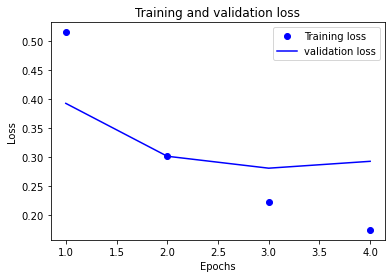

In [69]:
# plot the training and validation loss

import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 5)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="validation loss")
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot 2: training and validation accuracy

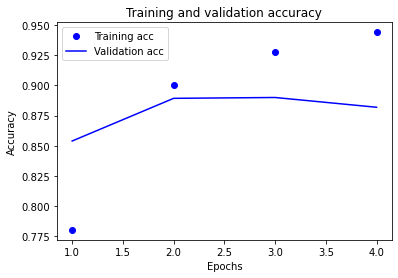

In [70]:
# plot the training and validation accuracy

plt.clf()   # clears the figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label="Training acc")
plt.plot(epochs, val_acc_values, 'b', label="Validation acc")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Evaluate the trained model - while validating

In [71]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3193 - accuracy: 0.8693: 0s - loss: 0
[0.3193119466304779, 0.8692799806594849]


# Train the model on the entire training set

In [72]:
# build the model
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])



history2 = model2.fit(x_train,
                    y_train,
                    epochs=4,
                    batch_size=512)

results = model2.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 0s 8ms/step - loss: 0.4396 - accuracy: 0.8204
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2523 - accuracy: 0.9103
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1941 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 1s 849us/step - loss: 0.2963 - accuracy: 0.8823
[0.29633039236068726, 0.882319986820221]


# Generate Predictions

In [52]:
print(model.predict(x_test))

[[3.2472014e-03]
 [1.0000000e+00]
 [9.8970866e-01]
 ...
 [3.5217404e-04]
 [2.4462044e-03]
 [7.8724790e-01]]
